In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('C:/Users/HP/Desktop/veri b projesi yorumsuz halleri/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
# Kategorik verileri model için düzenleyelim.
df = pd.get_dummies(df, columns = [ 'Job Title'])

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,1,0,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,0,3,3.0,65000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,5,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,0,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,3,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#X = df.drop(['Gender', 'Job Title'], axis = 1)
X = df.drop(['Gender'], axis = 1)
y = df['Gender'] 

In [6]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test) 
y_prob = model.predict_proba(X_test)[:, 1]  # Olumlu sınıfın olasılığı

# Tahmin edilen ve gerçek değerleri karşılaştırma
results = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahminler': y_pred})
print(results)

      Gerçek Değerler  Tahminler
2794                0          0
2233                1          1
5559                1          1
6355                1          1
263                 0          0
...               ...        ...
3193                0          0
2157                1          1
2202                1          1
1801                1          1
2836                0          0

[1341 rows x 2 columns]


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [10]:
# Doğruluk (Accuracy) hesaplama:
acc = accuracy_score(y_test, y_pred)
print("Doğruluk:", acc)

# Hassasiyet (Precision) hesaplama:
prec = precision_score(y_test, y_pred)
print("Hassasiyet:", prec)

# Duyarlılık (Recall) hesaplama:
rec = recall_score(y_test, y_pred)
print("Duyarlılık:", rec)

# F1 Puanı (F1 Score) hesaplama:
f1 = f1_score(y_test, y_pred)
print("F1 Skor:", f1)

Doğruluk: 0.912751677852349


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

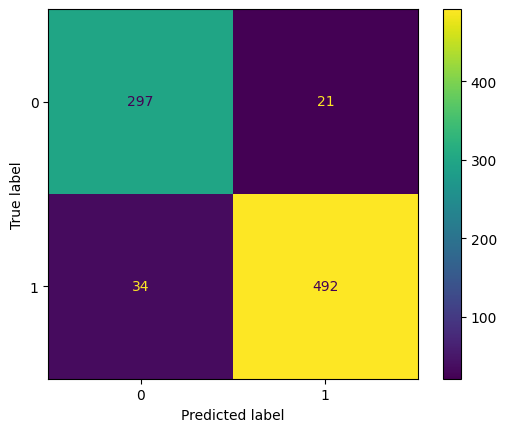

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics 

# Confusion Matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [133]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       318
           1       0.96      0.94      0.95       526

    accuracy                           0.93       844
   macro avg       0.93      0.93      0.93       844
weighted avg       0.94      0.93      0.94       844



In [134]:
# Eğitim seti performansı
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test seti performansı
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Eğitim Doğruluğu: {train_accuracy}')
print(f'Test Doğruluğu: {test_accuracy}')

Eğitim Doğruluğu: 0.9739104654610139
Test Doğruluğu: 0.9348341232227488


In [135]:
if train_accuracy - test_accuracy > 0.05:
    print("Model overfitting gösteriyor.")
else:
    print("Model overfitting göstermiyor.")

Model overfitting göstermiyor.
